# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Online Retail/OnlineRetail.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **Data** **PreProcessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [ ]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## **Insights**

In [ ]:
totalCustomers = df['CustomerID'].nunique()
print(f'Total number of customers: {totalCustomers}')

Total number of customers: 4372


In [ ]:
total_sales = df['TotalPrice'].sum()
print(f'Total sales (Overall): {total_sales:,.2f}')

Total sales (Overall): 8,300,065.81


In [ ]:
data = df.copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 31.0+ MB


## **Total Sales (Overall)**

In [ ]:
data.set_index('InvoiceDate', inplace=True)

In [ ]:
monthly_sales = data.resample('M')['TotalPrice'].sum()
print(f'Monthly Sales :{monthly_sales}')

Monthly Sales :InvoiceDate
2010-12-31     554604.020
2011-01-31     475074.380
2011-02-28     436546.150
2011-03-31     579964.610
2011-04-30     426047.851
2011-05-31     648251.080
2011-06-30     608013.160
2011-07-31     574238.481
2011-08-31     616368.000
2011-09-30     931440.372
2011-10-31     974603.590
2011-11-30    1132407.740
2011-12-31     342506.380
Freq: ME, Name: TotalPrice, dtype: float64


/tmp/ipython-input-18-2731500356.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M')['TotalPrice'].sum()


In [ ]:
daily_sales = data['TotalPrice'].resample('D').sum()
print(f'Daily Sales: {daily_sales}')

Daily Sales: InvoiceDate
2010-12-01    46051.26
2010-12-02    45775.43
2010-12-03    22598.46
2010-12-04        0.00
2010-12-05    31380.60
                ...   
2011-12-05    56634.53
2011-12-06    43659.20
2011-12-07    68991.27
2011-12-08    49442.19
2011-12-09    15560.21
Freq: D, Name: TotalPrice, Length: 374, dtype: float64


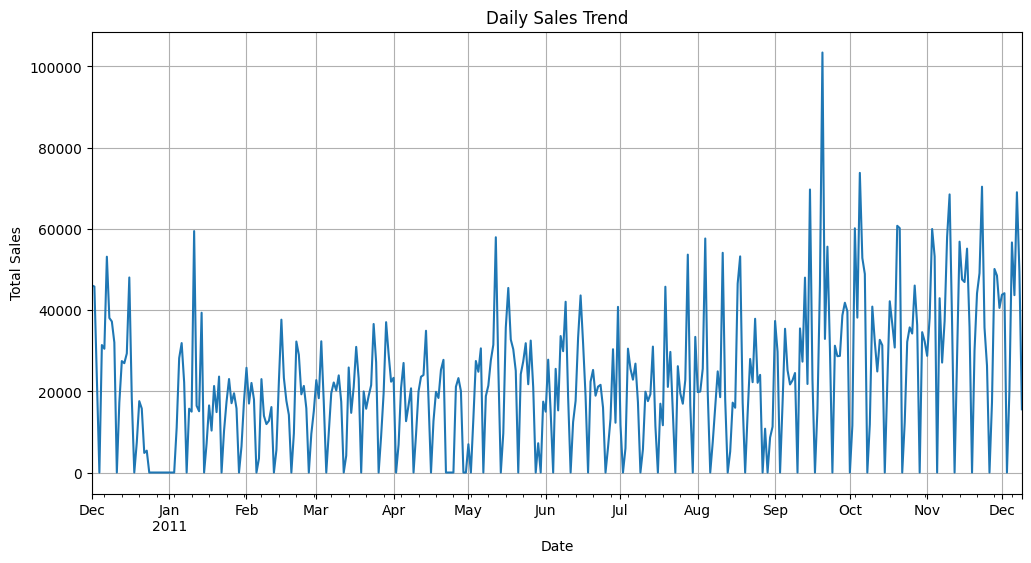

In [ ]:
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)

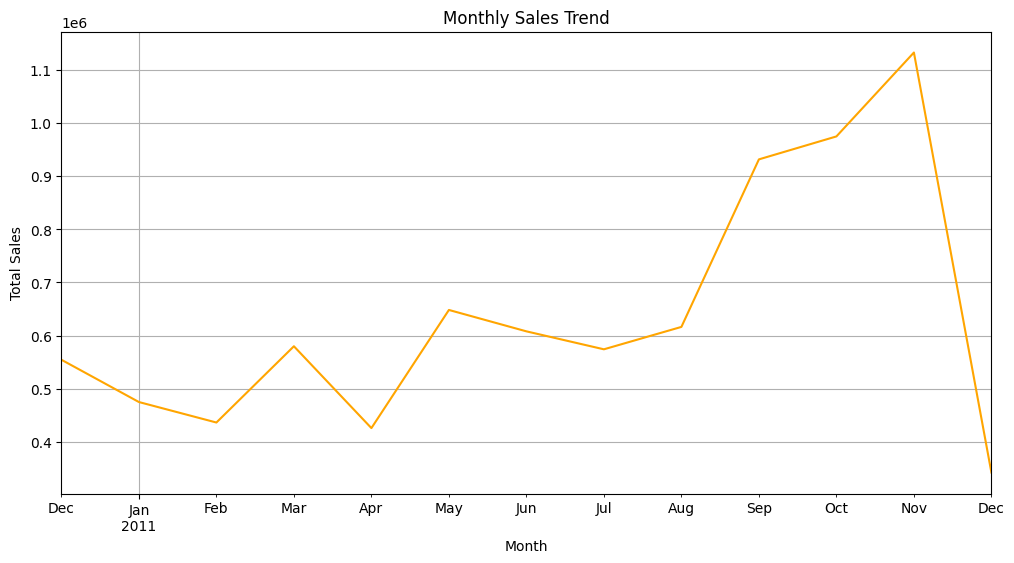

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)

## **Top-Selling Products**

In [ ]:
top_products_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).reset_index()
top_products_revenue = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
print(f'Top-Selling Products (Quantity):\n{top_products_quantity.head(10)}')
print(f'Top-Revenue Products (TotalPrice):\n{top_products_revenue.head(10)}')

Top-Selling Products (Quantity):
  StockCode  Quantity
0     84077     53215
1     22197     48712
2    85099B     45066
3     84879     35314
4    85123A     34204
5     21212     33409
6     23084     27094
7     22492     25880
8     22616     25321
9     21977     24163
Top-Revenue Products (TotalPrice):
  StockCode  TotalPrice
0     22423   132870.40
1    85123A    93979.20
2    85099B    83236.76
3     47566    67687.53
4      POST    66710.24
5     84879    56499.22
6     23084    51137.80
7     22502    46980.95
8     79321    45936.81
9     22086    41500.48


/tmp/ipython-input-23-294980301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='Quantity', data=top_products_quantity.head(10), palette='Blues_d')


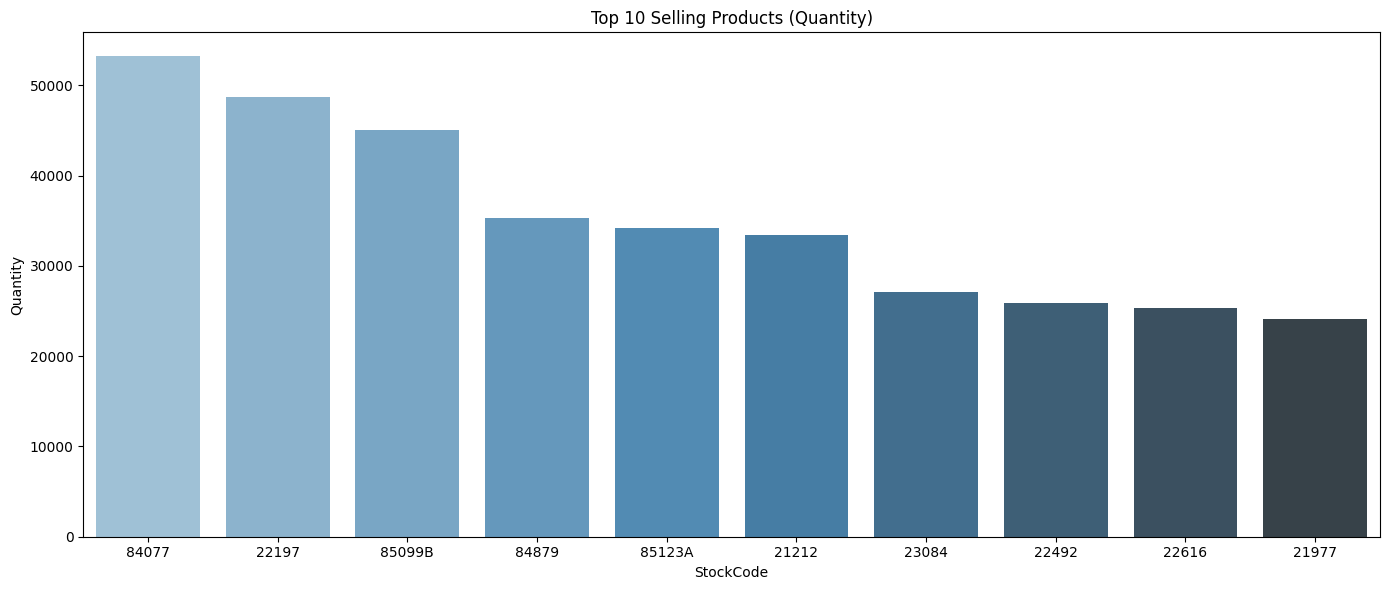

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='StockCode', y='Quantity', data=top_products_quantity.head(10), palette='Blues_d')
plt.title('Top 10 Selling Products (Quantity)')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-3176927125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StockCode', y='TotalPrice', data=top_products_revenue.head(10), palette='Oranges_d')


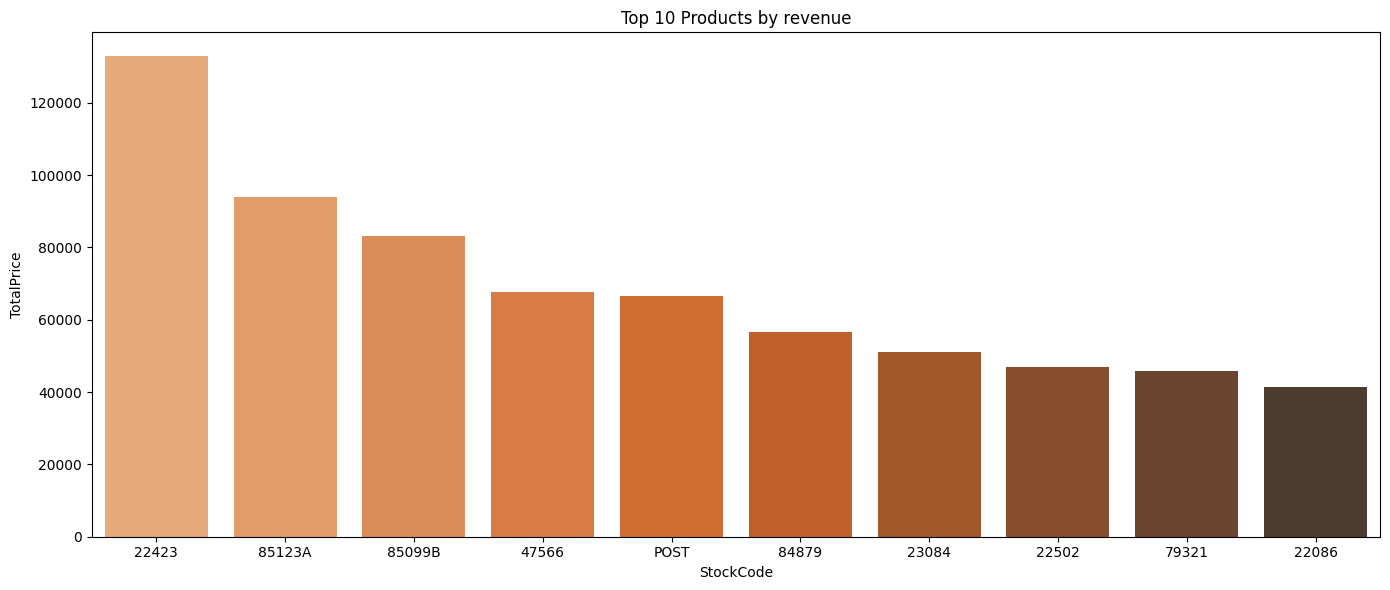

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='StockCode', y='TotalPrice', data=top_products_revenue.head(10), palette='Oranges_d')
plt.title('Top 10 Products by revenue')
plt.xlabel('StockCode')
plt.ylabel('TotalPrice')
plt.tight_layout()
plt.show()

## **Sales by Country**

In [ ]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

In [ ]:
print(f'Top 10 countries by revenue: {country_sales.head(10)}')

Top 10 countries by revenue:           Country   TotalPrice
0  United Kingdom  6767873.394
1     Netherlands   284661.540
2            EIRE   250285.220
3         Germany   221698.210
4          France   196712.840
5       Australia   137077.270
6     Switzerland    55739.400
7           Spain    54774.580
8         Belgium    40910.960
9          Sweden    36595.910


## **Number of Orders (Invoices) by Country**

In [ ]:
country_orders = (df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo': 'NumOrders'}))

In [ ]:
print(f'top 10 countries by orders: {country_orders.head(10)}')

top 10 countries by orders:           Country  NumOrders
0  United Kingdom      19857
1         Germany        603
2          France        458
3            EIRE        319
4         Belgium        119
5           Spain        105
6     Netherlands        101
7     Switzerland         71
8        Portugal         70
9       Australia         69


/tmp/ipython-input-29-1992398426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalPrice', data=country_sales.head(10), palette='Greens_d')


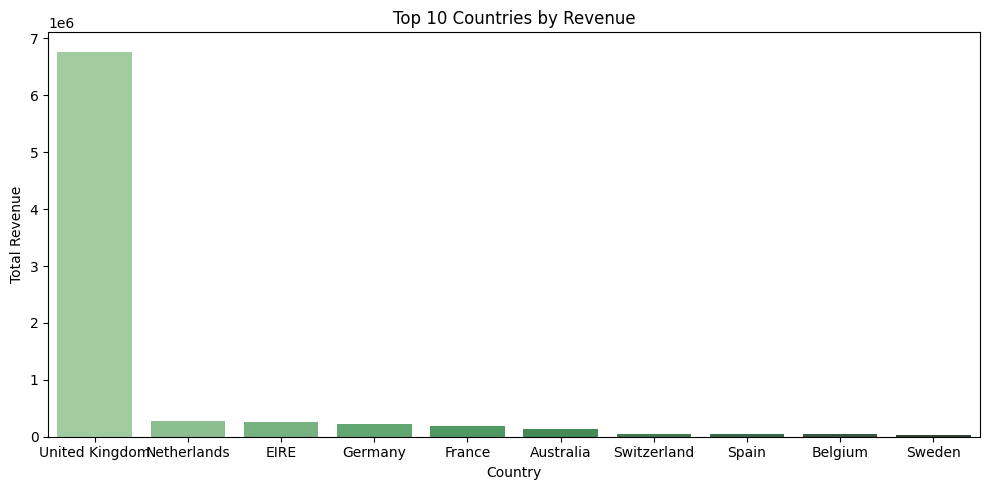

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='TotalPrice', data=country_sales.head(10), palette='Greens_d')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

/tmp/ipython-input-30-1866444172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='NumOrders', data=country_orders.head(10), palette='Reds_d')


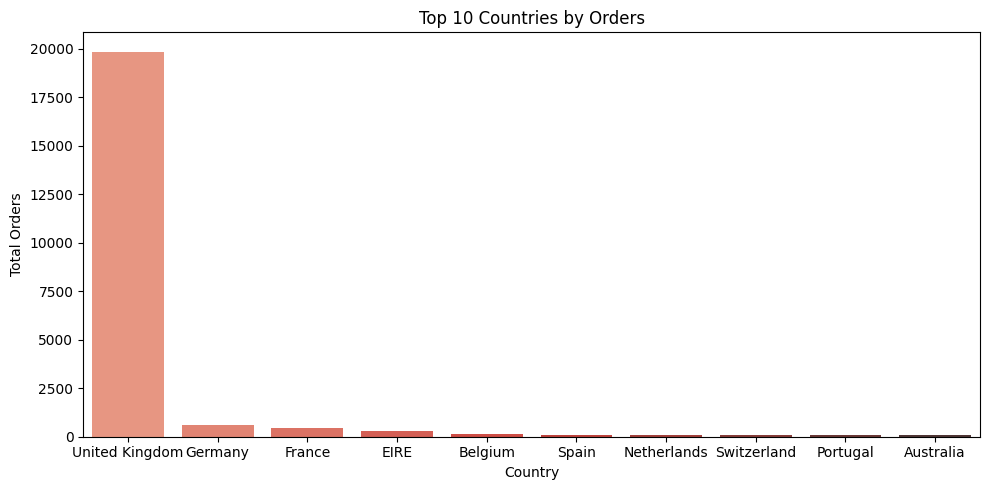

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='NumOrders', data=country_orders.head(10), palette='Reds_d')
plt.title('Top 10 Countries by Orders')
plt.xlabel('Country')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

## **Customer Lifetime Value (CLV)**

In [ ]:
df['CustomerID'].nunique()

4372

## **Top 10 Customers**

In [ ]:
clv = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).reset_index().rename(columns={'TotalPrice': 'CLV'})

In [ ]:
print(f'Top 10 valuable customers : {clv.head(10)}')

Top 10 valuable customers :    CustomerID        CLV
0       14646  279489.02
1       18102  256438.49
2       17450  187482.17
3       14911  132572.62
4       12415  123725.45
5       14156  113384.14
6       17511   88125.38
7       16684   65892.08
8       13694   62653.10
9       15311   59419.34


/tmp/ipython-input-34-3587068314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv.head(10), x='CustomerID', y='CLV', palette='coolwarm')


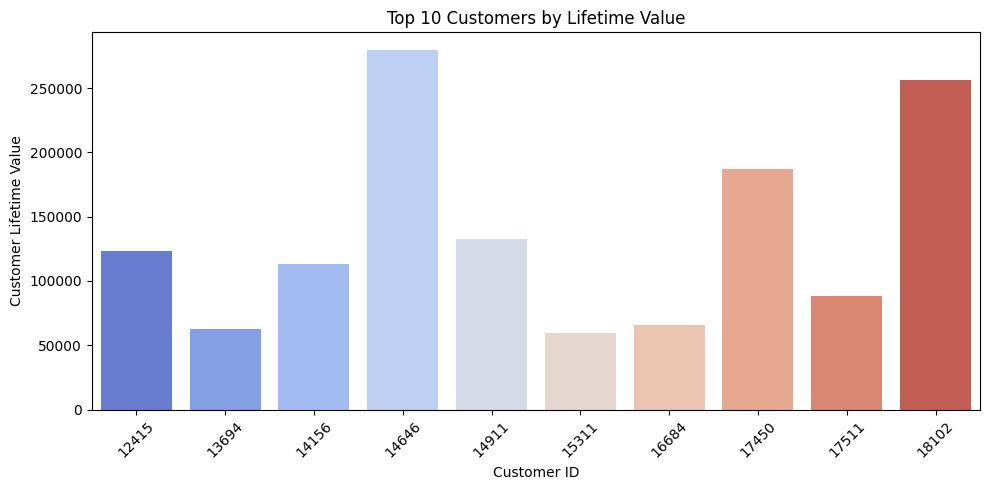

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=clv.head(10), x='CustomerID', y='CLV', palette='coolwarm')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Customer Lifetime Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Repeat Purchase Rate**

In [ ]:
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index().rename(columns={'InvoiceNo': 'Frequency'})

In [ ]:
customer_frequency.head()

,CustomerID,Frequency
0,14911,248
1,12748,224
2,17841,169
3,14606,128
4,15311,118


/tmp/ipython-input-37-316008069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_frequency.head(10), x='CustomerID', y='Frequency', palette='magma')


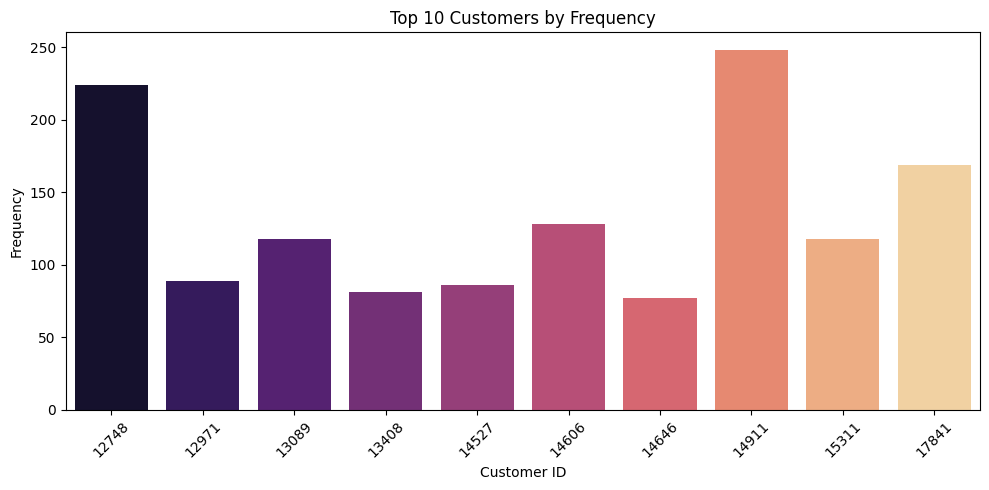

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=customer_frequency.head(10), x='CustomerID', y='Frequency', palette='magma')
plt.title('Top 10 Customers by Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Average Basket Size**

In [ ]:
items_per_order = df.groupby('InvoiceNo')['Quantity'].sum()

In [ ]:
avg_items_per_order = items_per_order.mean()
print(f'Average number of items per order: {avg_items_per_order}')

Average number of items per order: 221.13059936908516


In [ ]:
revenue_per_order = df.groupby('InvoiceNo')['TotalPrice'].sum()

In [ ]:
avg_revenue_per_order = revenue_per_order.mean()
print(f'Average revenue per order: {avg_revenue_per_order}')

Average revenue per order: 374.0453273546642


## **Most products returned**

In [ ]:
returned_df = df[df['Quantity'] < 0]
returned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [ ]:
most_returned = returned_df.groupby('StockCode')['Quantity'].sum().sort_values().reset_index()

/tmp/ipython-input-44-2478025752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_returned.head(10), x='StockCode', y='Quantity', palette='rocket')


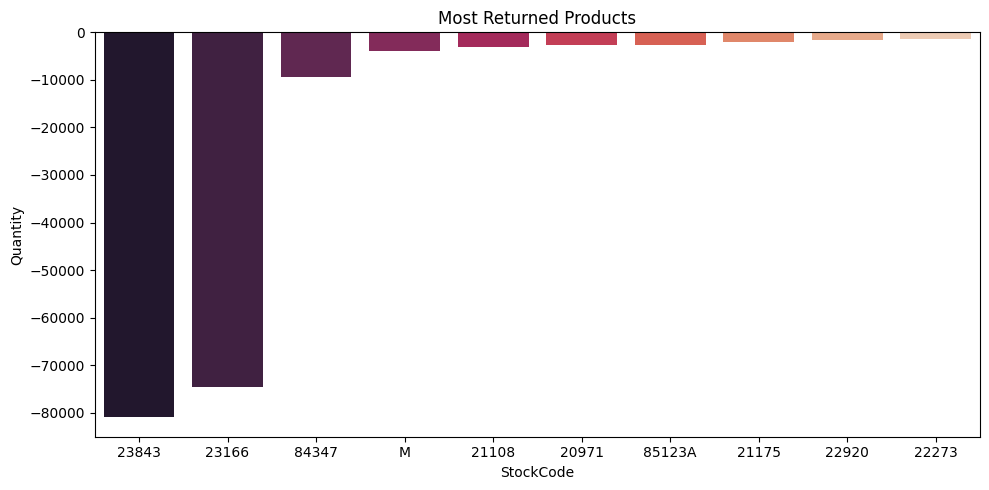

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=most_returned.head(10), x='StockCode', y='Quantity', palette='rocket')
plt.title('Most Returned Products')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

## **Average Order Size per Product**

In [ ]:
product_order_qty = df.groupby(['StockCode', 'InvoiceNo'])['Quantity'].sum().reset_index()

In [ ]:
avg_order_size = product_order_qty.groupby('StockCode')['Quantity'].mean().sort_values(ascending=False).reset_index()

/tmp/ipython-input-47-1595999346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_order_size.head(10), x='StockCode', y='Quantity', palette='rocket')


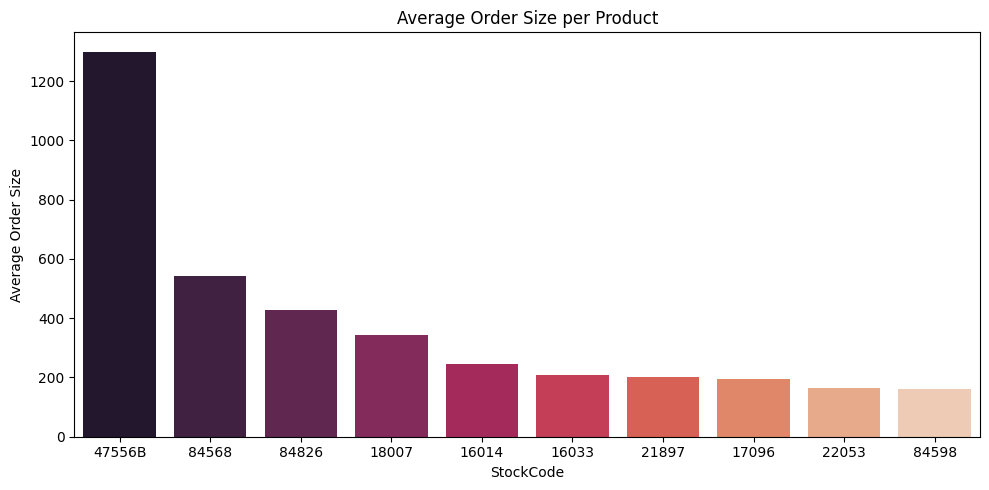

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=avg_order_size.head(10), x='StockCode', y='Quantity', palette='rocket')
plt.title('Average Order Size per Product')
plt.xlabel('StockCode')
plt.ylabel('Average Order Size')
plt.tight_layout()
plt.show()

## **Product Popularity by Country**

In [ ]:
product_popularity = df.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index().sort_values(['Country', 'Quantity'], ascending=[True, False])

In [ ]:
top_product_per_country = product_popularity.groupby('Country').head(10).reset_index(drop=True)

In [ ]:
top_product_per_country

,Country,StockCode,Quantity
0,Australia,22492,2916
1,Australia,23084,1884
2,Australia,21915,1704
3,Australia,21731,1344
4,Australia,22630,1024
...,...,...,...
364,Unspecified,21499,25
365,Unspecified,21500,25
366,Unspecified,21503,25
367,Unspecified,22046,25


In [ ]:
top_france = top_product_per_country[top_product_per_country['Country'] == 'France']

/tmp/ipython-input-52-3963679409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_france, x='StockCode', y='Quantity', palette='cool')


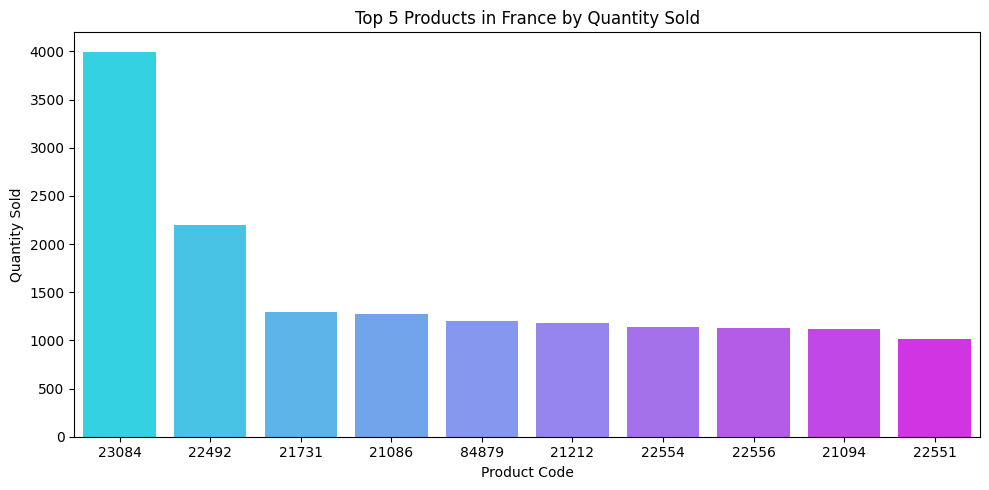

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_france, x='StockCode', y='Quantity', palette='cool')
plt.title(f'Top 5 Products in France by Quantity Sold')
plt.xlabel('Product Code')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

## **Pricing Sensitivity**

In [ ]:
price_quantity = (
    df[df['Quantity']>0]
    .groupby('UnitPrice')['Quantity']
    .sum()
    .reset_index()
    .sort_values('UnitPrice')
)

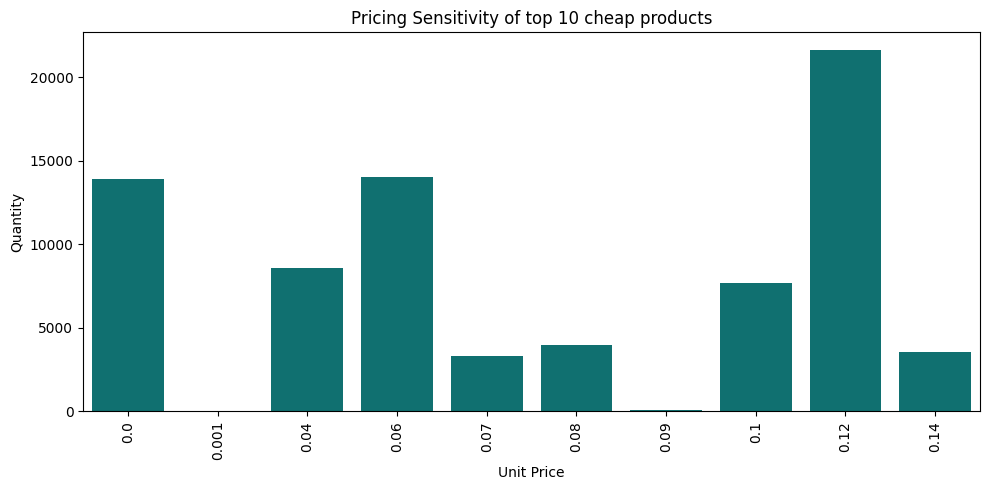

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=price_quantity.head(10), x='UnitPrice', y='Quantity', color='teal')
plt.title('Pricing Sensitivity of top 10 cheap products')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

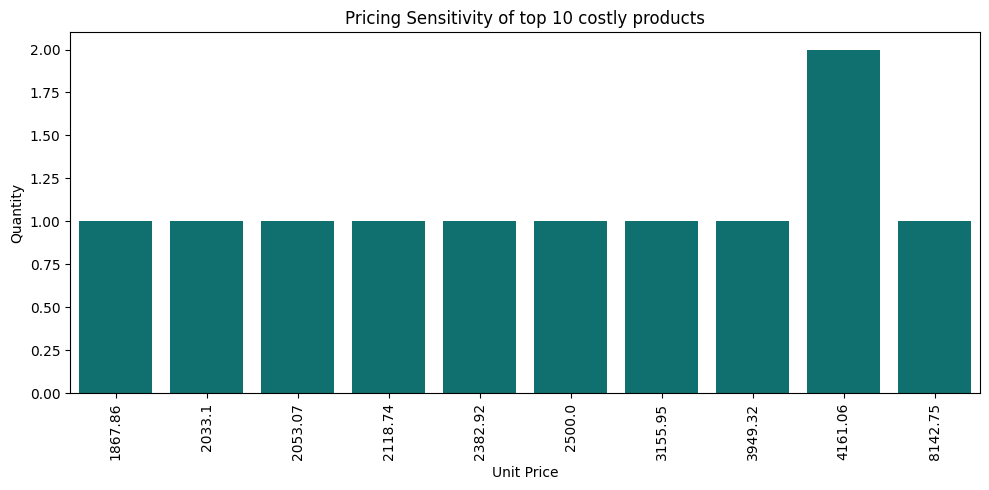

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=price_quantity.tail(10), x='UnitPrice', y='Quantity', color='teal')
plt.title('Pricing Sensitivity of top 10 costly products')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Recency Anaysis**

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [ ]:
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days

In [ ]:
recency.head()

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,326
1,12347,2011-12-07 15:52:00,2
2,12348,2011-09-25 13:13:00,75
3,12349,2011-11-21 09:51:00,19
4,12350,2011-02-02 16:01:00,310


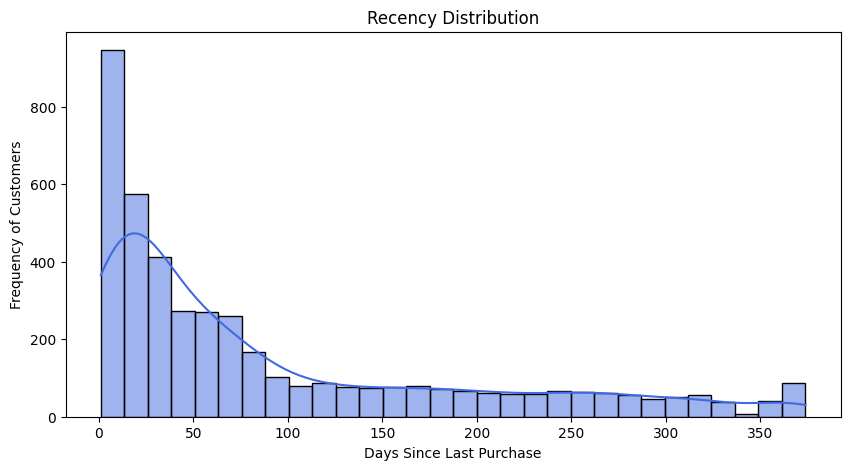

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(recency['Recency'], bins=30, kde=True, color='royalblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency of Customers')
plt.show()

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

In [ ]:
rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346,326,2,0.00
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


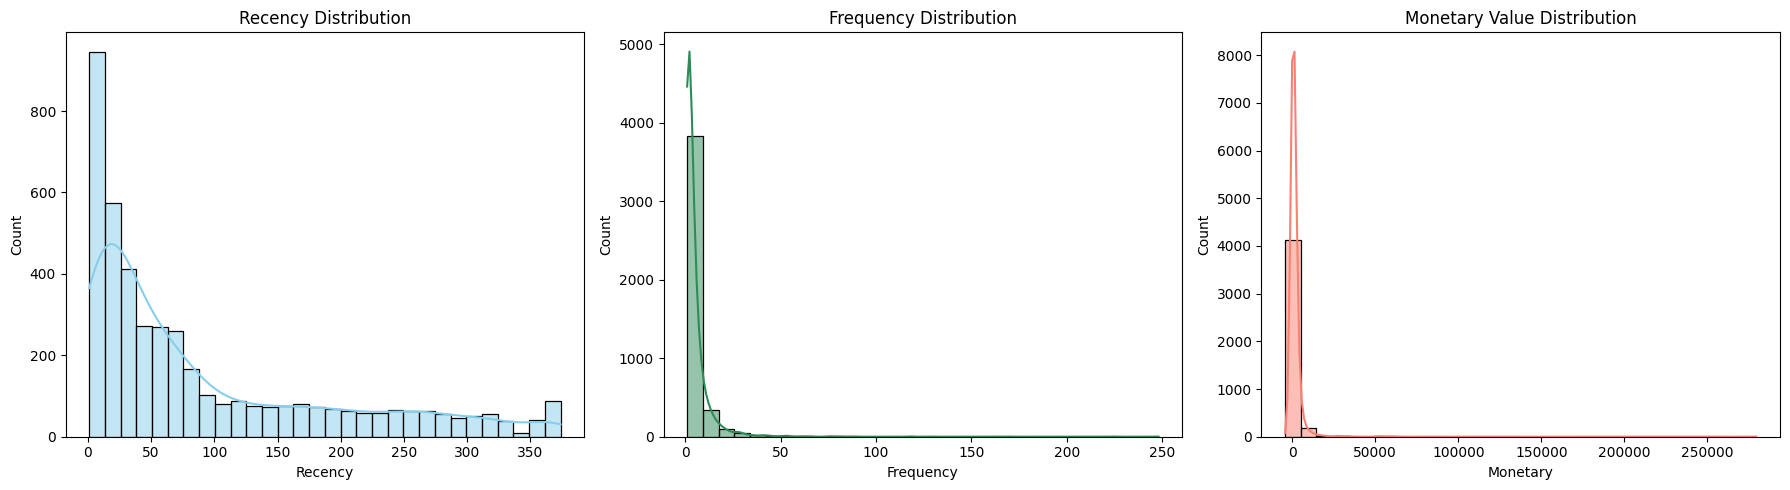

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axs[1], color='seagreen')
axs[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axs[2], color='salmon')
axs[2].set_title('Monetary Value Distribution')

plt.tight_layout()
plt.show()

## **Customer Segmentation**

In [ ]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [ ]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346,326,2,0.00,1,2,1,121
1,12347,2,7,4310.00,5,4,5,545
2,12348,75,4,1797.24,2,3,4,234
3,12349,19,1,1757.55,4,1,4,414
4,12350,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4367,18280,278,1,180.60,1,2,1,121
4368,18281,181,1,80.82,1,2,1,121
4369,18282,8,3,176.60,5,3,1,531
4370,18283,4,16,2094.88,5,5,5,555


In [ ]:
def segment_customer(df):
    if df['R_score'] >= 4 and df['F_score'] >= 4 and df['M_score'] >= 4:
        return 'Champion'
    elif df['R_score'] >= 3 and df['F_score'] >= 3 and df['M_score'] >= 3:
        return 'Loyal'
    elif df['R_score'] >= 4 and df['F_score'] <= 2:
        return 'Potential'
    elif df['R_score'] <= 2 and df['F_score'] >= 4:
        return 'At Risk'
    elif df['R_score'] <= 2 and df['F_score'] <= 2:
        return 'Hibernating'
    else:
        return 'Others'

In [ ]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346,326,2,0.00,1,2,1,121,Hibernating
1,12347,2,7,4310.00,5,4,5,545,Champion
2,12348,75,4,1797.24,2,3,4,234,Others
3,12349,19,1,1757.55,4,1,4,414,Potential
4,12350,310,1,334.40,1,1,2,112,Hibernating


/tmp/ipython-input-73-1544133528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


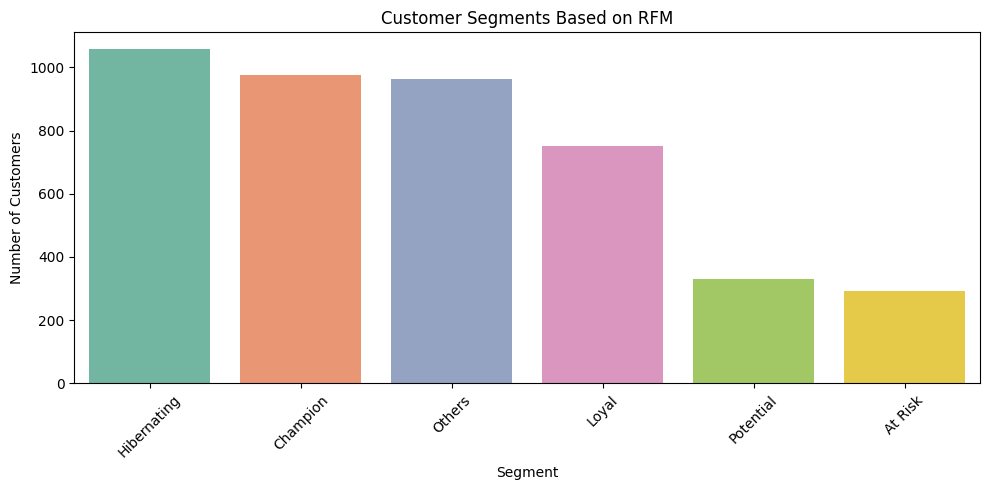

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('Customer Segments Based on RFM')
plt.xticks(rotation=45)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

## **Model building for Cluster Analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
rfm_cluster = rfm[['Recency','Frequency','Monetary']].copy()

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_cluster)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i, random_state=42)
  km.fit(rfm_scaled)
  wcss.append(km.inertia_)

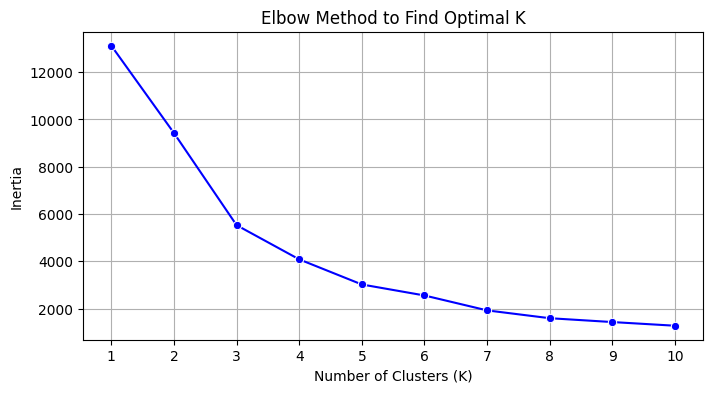

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
rfm['Clusters'] = km.fit_predict(rfm_scaled)

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,Clusters
0,12346,326,2,0.00,1,2,1,121,Hibernating,1
1,12347,2,7,4310.00,5,4,5,545,Champion,3
2,12348,75,4,1797.24,2,3,4,234,Others,3
3,12349,19,1,1757.55,4,1,4,414,Potential,3
4,12350,310,1,334.40,1,1,2,112,Hibernating,1


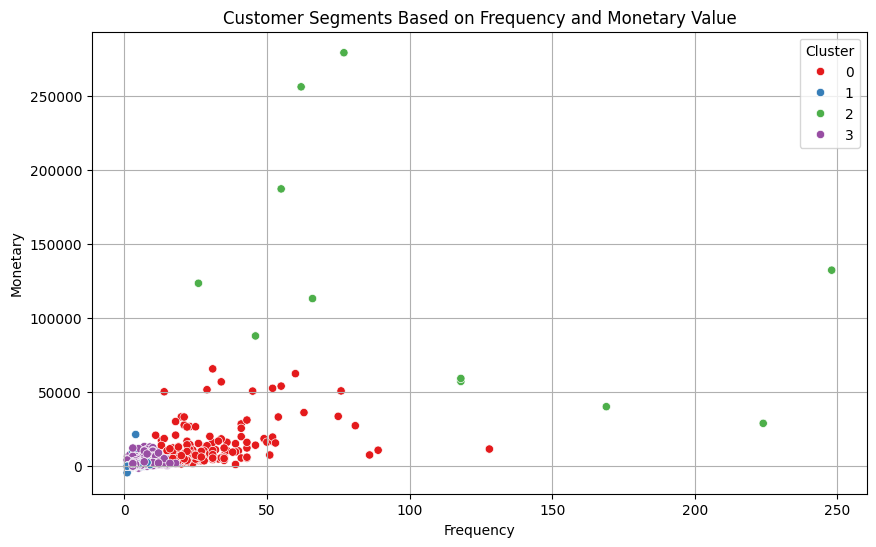

In [ ]:
# Monetary vs Frequency (Colored by Cluster)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Clusters', palette='Set1')
plt.title('Customer Segments Based on Frequency and Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

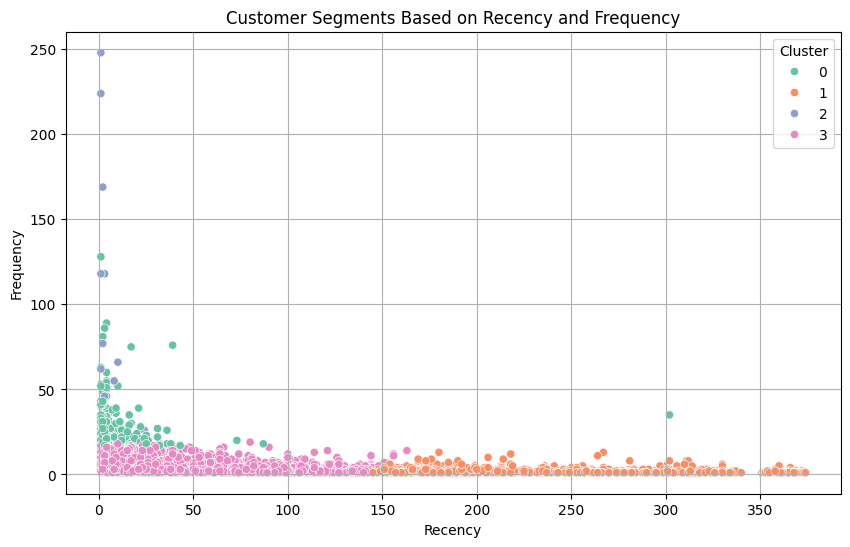

In [ ]:
# Recency vs Frequency:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Clusters', palette='Set2')
plt.title('Customer Segments Based on Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

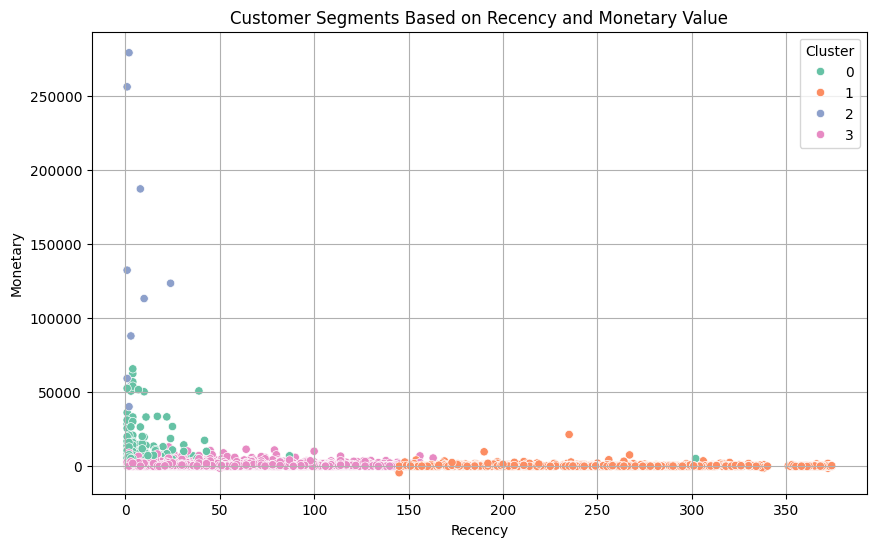

In [ ]:
# Recency vs Monetary:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Clusters', palette='Set2')
plt.title('Customer Segments Based on Recency and Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()